# Imports 

In [ ]:
import pandas as pd
import numpy as np 
import time 
import datetime 
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.preprocessing import StandardScaler

# Reading Dataset 

In [ ]:
orig_df = pd.read_csv('/content/drive/MyDrive/delhi_weather_final.csv') 
df = orig_df.copy() 
print(f'Size of the dataset: {df.shape} \n')  
print() 
display(df.head(5))

Size of the dataset: (100990, 4) 




,datetime_utc,_tempm,_pressurem,_hum
0,19961101-11:00,30.0,1010.0,27.0
1,19961101-12:00,28.0,-9999.0,32.0
2,19961101-13:00,24.0,-9999.0,44.0
3,19961101-14:00,24.0,1010.0,41.0
4,19961101-16:00,23.0,1011.0,47.0


# Cleaning the data 

### Renaming he columns 

In [ ]:
df.columns = ['Date' , 'Temperature', 'Pressure' , 'Humidity']

### Removing possible outliers

In [ ]:
df.describe()

,Temperature,Pressure,Humidity
count,100317.000000,1.007580e+05,100233.000000
mean,25.451269,1.932331e+03,57.909481
std,8.482859,3.183786e+05,23.807771
min,1.000000,-9.999000e+03,4.000000
25%,19.000000,1.002000e+03,39.000000
50%,27.000000,1.008000e+03,59.000000
75%,32.000000,1.014000e+03,78.000000
max,90.000000,1.010614e+08,243.000000


In [ ]:
display(df.quantile([0 , 0.25 , 0.5 , 0.75 , 1] , axis = 0 ))

,Temperature,Pressure,Humidity
0.00,1.0,-9999.0,4.0
0.25,19.0,1002.0,39.0
0.50,27.0,1008.0,59.0
0.75,32.0,1014.0,78.0
1.00,90.0,101061443.0,243.0


In [ ]:
df.shape

(100990, 4)

In [ ]:
df = df[(df['Humidity'] >= 39) & (df['Humidity'] <= 78)]
df = df[(df['Pressure'] >= 1002.0) & (df['Pressure'] <= 1014.0)]
df = df[(df['Temperature'] >= 19.0) & (df['Temperature'] <= 32.0)]

In [ ]:
df.shape

(19874, 4)

In [ ]:
max_temp = np.max(df['Temperature'])
max_pres = np.max(df['Pressure'])
max_humid = np.max(df['Humidity'])

min_temp = np.min(df['Temperature'])
min_pres = np.min(df['Pressure'])
min_humid = np.min(df['Humidity'])

print(f'Max Temp : {max_temp}')
print(f'Max Pressure : {max_pres}')
print(f'Max Humidity : {max_humid}')

print(f'Min Temp : {min_temp}')
print(f'Min Pressure : {min_pres}')
print(f'Min Humidity : {min_humid}')

Max Temp : 32.0
Max Pressure : 1014.0
Max Humidity : 78.0
Min Temp : 19.0
Min Pressure : 1002.0
Min Humidity : 39.0


### Removing Missing values 

In [ ]:
df.isnull().sum()

Date           0
Temperature    0
Pressure       0
Humidity       0
dtype: int64

In [ ]:
print('Dataframe shape : {}'.format(df.shape))

Dataframe shape : (19874, 4)


### Resetting index 

In [ ]:
idx = pd.date_range('1996-11-01 14:00:00', periods=19874 , freq='1h')

In [ ]:
df = df.set_index(idx)
df.index.name = 'Timestamp' 
date_column = df['Date'] 
df = df.drop(columns = ['Date'] , axis = 1)

In [ ]:
df.head()

,Temperature,Pressure,Humidity
Timestamp,,,
1996-11-01 14:00:00,24.0,1010.0,41.0
1996-11-01 15:00:00,23.0,1011.0,47.0
1996-11-01 16:00:00,21.0,1011.0,56.0
1996-11-01 17:00:00,21.0,1010.0,60.0
1996-11-01 18:00:00,19.0,1010.0,68.0


In [ ]:
df_array = np.array(df) 
df_array

array([[  24., 1010.,   41.],
       [  23., 1011.,   47.],
       [  21., 1011.,   56.],
       ...,
       [  27., 1002.,   45.],
       [  30., 1002.,   41.],
       [  26., 1004.,   40.]])

### Reducing size for faster computation

In [ ]:
df_array = df_array[:5000]
df_array.shape 

(5000, 3)

### Scaling features 

In [ ]:
scaler = StandardScaler() 
scaled_df_array = scaler.fit_transform(df_array)

In [ ]:
scaled_df_array[:5]

array([[-0.54774188,  0.40231553, -1.48362502],
       [-0.80245815,  0.6821288 , -0.95776549],
       [-1.3118907 ,  0.6821288 , -0.1689762 ],
       [-1.3118907 ,  0.40231553,  0.18159682],
       [-1.82132325,  0.40231553,  0.88274286]])

### Segregating feaures 

In [ ]:
  sha = scaled_df_array[:, 0].reshape((-1, 1))
  spa = scaled_df_array[:, 1].reshape((-1, 1))
  sta = scaled_df_array[:, 2].reshape((-1, 1))

  sha.shape , spa.shape , sta.shape 

((5000, 1), (5000, 1), (5000, 1))

# Preparing training and test set

### Preparing training set

In [ ]:
train_data_len = int(np.ceil(len(df_array)* 0.95))
train_data_len

4750

In [ ]:
x_train = []
y_train_temp = [] 
y_train_humidity = [] 
y_train_pressure = [] 

for i in range(48 , train_data_len) : 
  temp1 = sha[i - 48 : i, 0] 
  temp2 = spa[i - 48 : i, 0] 
  temp3 = sta[i - 48 : i, 0] 
  temp4 = np.concatenate((temp1 , temp2 , temp3))

  x_train.append(temp4) 
  y_train_temp.append(sta[i, 0])
  y_train_humidity.append(sha[i, 0])
  y_train_pressure.append(spa[i, 0])

  if i <= 49 : 
    print(x_train , np.array(x_train).shape)
    print()
    print(y_train_temp , y_train_humidity, y_train_pressure)
    print()
   

[array([-0.54774188, -0.80245815, -1.3118907 , -1.3118907 , -1.82132325,
       -1.82132325, -1.82132325, -1.82132325, -1.82132325, -1.56660698,
       -1.05717443, -0.80245815, -0.03830933, -0.2930256 , -1.05717443,
       -1.3118907 , -1.82132325, -1.56660698, -1.82132325, -1.82132325,
       -1.82132325, -1.05717443, -1.05717443, -0.03830933,  0.21640695,
       -0.03830933, -1.05717443, -1.05717443, -1.3118907 , -1.3118907 ,
       -1.56660698, -1.56660698, -1.82132325, -1.82132325, -1.82132325,
       -1.56660698, -0.03830933, -0.2930256 , -0.80245815, -1.3118907 ,
       -1.3118907 , -1.56660698, -1.82132325, -1.82132325, -1.82132325,
       -1.05717443, -1.56660698, -1.82132325,  0.40231553,  0.6821288 ,
        0.6821288 ,  0.40231553,  0.40231553,  0.12250225,  0.12250225,
        0.40231553,  0.40231553,  0.6821288 ,  0.96194208,  0.96194208,
        0.96194208,  0.12250225,  0.40231553,  0.40231553,  0.40231553,
        0.40231553,  0.12250225,  0.12250225,  0.96194208,  0.9

In [ ]:
np.array(x_train).shape , np.array(y_train_humidity).shape, np.array(y_train_pressure).shape , np.array(y_train_temp).shape

((4702, 144), (4702,), (4702,), (4702,))

In [ ]:
x_train = np.array(x_train).reshape((-1 , 144 , 1))
y_train_humidity = np.array(y_train_humidity)
y_train_pressure = np.array(y_train_pressure)
y_train_temp = np.array(y_train_temp)

### Preparing testing set

In [ ]:
test_data = sta[train_data_len - 48 : , :]
test_data.shape

(298, 1)

In [ ]:
x_test = []

y_test_temp = sta[train_data_len : , :] 
y_test_humidity = sha[train_data_len : , :]
y_test_pressure = spa[train_data_len : , :]

for i in range (48 , len(test_data)):
  temp1 = sha[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp2 = spa[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp3 = sta[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]

  temp4 = np.concatenate((temp1 , temp2 , temp3))
  x_test.append(temp4)
  
  if  i<=49:
    print(x_test , np.array(x_test).shape)
    print()
    print(y_test_temp , y_test_humidity, y_test_pressure)
    print()
    

[array([[-0.54774188],
       [-0.80245815],
       [-1.05717443],
       [-1.05717443],
       [-1.05717443],
       [-1.3118907 ],
       [-1.82132325],
       [-1.3118907 ],
       [-0.54774188],
       [-0.2930256 ],
       [-0.03830933],
       [ 0.21640695],
       [-0.03830933],
       [-0.54774188],
       [-1.05717443],
       [-1.3118907 ],
       [-0.2930256 ],
       [ 0.21640695],
       [ 0.47112322],
       [ 0.7258395 ],
       [ 0.47112322],
       [ 0.21640695],
       [-0.03830933],
       [-0.2930256 ],
       [-0.54774188],
       [-0.80245815],
       [-1.05717443],
       [-1.05717443],
       [-1.82132325],
       [-0.80245815],
       [-0.2930256 ],
       [ 0.47112322],
       [ 0.47112322],
       [ 0.7258395 ],
       [ 0.7258395 ],
       [ 0.7258395 ],
       [ 0.7258395 ],
       [ 0.47112322],
       [ 0.21640695],
       [-0.03830933],
       [-0.03830933],
       [-0.2930256 ],
       [-0.80245815],
       [-1.05717443],
       [-1.56660698],
       [-

In [ ]:
x_test = np.array(x_test)

y_test_humidity = np.array(y_test_humidity)
y_test_pressure = np.array(y_test_pressure)
y_test_temp = np.array(y_test_temp)

In [ ]:
x_test.shape , y_test_humidity.shape , y_test_pressure.shape , y_test_temp.shape

((250, 144, 1), (250, 1), (250, 1), (250, 1))

In [ ]:
print(x_train.shape )
x_test.shape

(4702, 144, 1)


(250, 144, 1)

# Creating model 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM  , Dense
from keras.callbacks import EarlyStopping

### Temperature model

#### RNN's

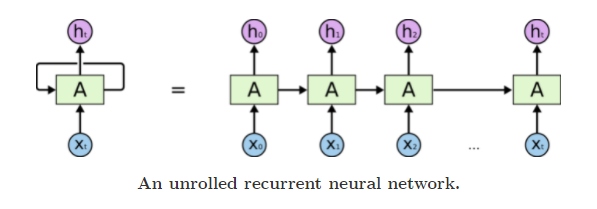

#### What are LSTM's

THE CORE IDEA 

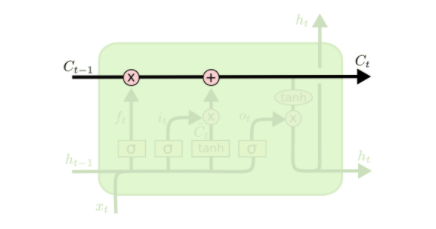

1) THE FORGET GATE 

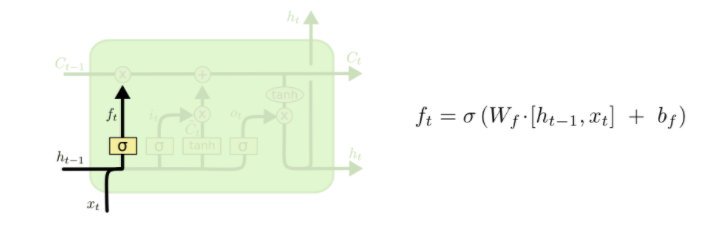

2) INPUT GATE 

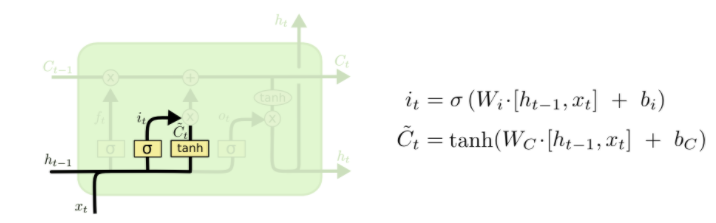

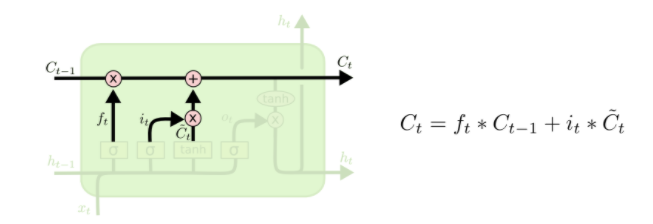

OUTPUT GATE 

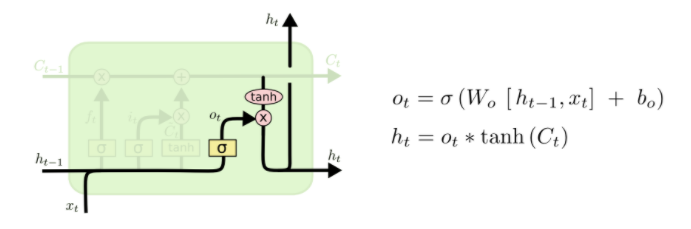#### Defining Architecure 

In [ ]:
temperature_model = Sequential()

In [ ]:
temperature_model.add(LSTM(128 , return_sequences = True , input_shape = (x_train.shape[1] , 1) ))
temperature_model.add(LSTM(128 , return_sequences = False))
temperature_model.add(Dense(64 , activation = "relu"))
temperature_model.add(Dense(1))
temperature_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 144, 128)          66560     
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-trainable params: 0
_________________________________________________________________


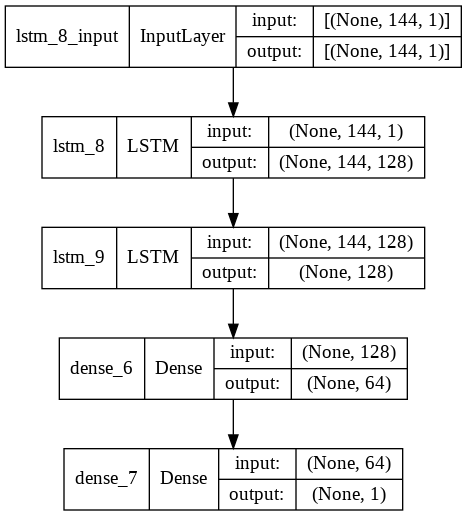

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(temperature_model , show_shapes = True )

### Compiling

Compiling with Adam optimizer because:- 

This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.

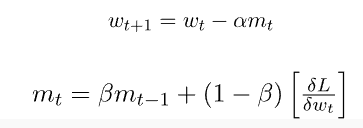

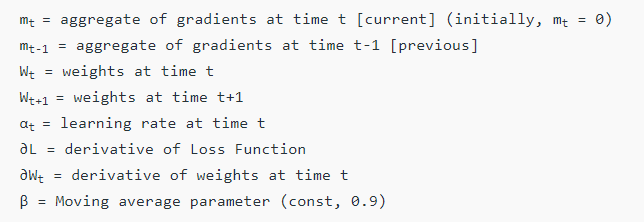

In [ ]:
temperature_model.compile(optimizer = "adam" , loss="mean_squared_error")
temperature_model

#### Training

In [ ]:
callbacks = EarlyStopping(
    patience = 5 , 
    restore_best_weights = True , 
    monitor = 'val_loss'
)

In [ ]:
history = temperature_model.fit(
    x_train , 
    y_train_temp , 
    batch_size = 256 , 
    epochs = 75 ,
    verbose = 1 , 
    validation_split = 0.2 , 
    callbacks = [callbacks]
)

Epoch 1/75
15/15 [==============================] - 6s 165ms/step - loss: 0.7110 - val_loss: 0.8567
Epoch 2/75
15/15 [==============================] - 1s 91ms/step - loss: 0.6261 - val_loss: 0.7694
Epoch 3/75
15/15 [==============================] - 1s 90ms/step - loss: 0.5557 - val_loss: 0.5801
Epoch 4/75
15/15 [==============================] - 1s 90ms/step - loss: 0.4448 - val_loss: 0.4306
Epoch 5/75
15/15 [==============================] - 1s 91ms/step - loss: 0.3962 - val_loss: 0.4464
Epoch 6/75
15/15 [==============================] - 1s 91ms/step - loss: 0.3909 - val_loss: 0.4361
Epoch 7/75
15/15 [==============================] - 1s 91ms/step - loss: 0.3907 - val_loss: 0.4292
Epoch 8/75
15/15 [==============================] - 1s 91ms/step - loss: 0.3876 - val_loss: 0.4267
Epoch 9/75
15/15 [==============================] - 1s 89ms/step - loss: 0.3866 - val_loss: 0.4237
Epoch 10/75
15/15 [==============================] - 1s 89ms/step - loss: 0.3895 - val_loss: 0.4208
Epoch 11

In [ ]:
yp = temperature_model.predict(x_test)
print(yp[:5])

# z = np.zeros(800).reshape((400,2))
# yp = np.concatenate((yp_copy , z) , axis = 1)
# print()
# print(yp[:5])

# ypi = scaler.inverse_transform(yp)
# print()
# print(ypi[:5])


# ypn = ypi[: , 0]
# print()
# print(ypn[:5])

# rmse 
rmse = np.sqrt(np.mean((yp - y_test_temp)**2))
print(f'RMSE: {rmse}')

[[-1.2728075]
 [-1.2140827]
 [-0.9442258]
 [-1.1192762]
 [-0.9304372]]
RMSE: 0.6923593806280702


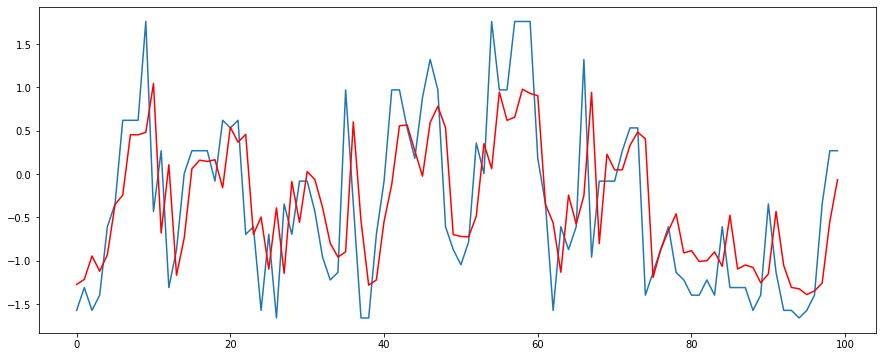

In [ ]:
plt.rcParams.update({'figure.figsize': (15,6)})
plt.plot(y_test_temp[:100])
plt.plot(yp[:100] , color = "red")